<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/GIT/Sectiom3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## N321 - 디버깅,  Class

### 디버깅, 함수

- 공식문서 : https://docs.python.org/3/library/pdb.html (3.7버전 이후 화면 한글로 변경가능)
- c(continue) : 다음 breackpoint로 이동
- l(list) : 주변 11줄 코드 출력
- s(step) : 다음 문장 실행 (함수일 때는 함수 내부로 들어가서 하나씩 실행)
- n(next) : 다음 문장 실행 (함수 내부로 들어가지 않고 바로 return값 받음)
- 현재 커서 row는 debug.py(n)에 표현됨


캡처.JPG

In [ ]:
import pdb
pdb.set_trace() # 3.7버전 이전

breakpoint() # 3.7 이후 버전

In [ ]:
abc = 1
breakpoint()
b = 345

>>   # 결과 : b 실행 직전에서 시점에서 버그체크 
-> b # abc 엔터 = 1 , b 엔터 = not defined 이런식으로 변수 확인도 가능  

### 파이썬 함수 def

- 변경이 불가한 int, str 등은 `값`으로 전달
- list와 dict같은 객체들은 `참조`로 전달
- 필수 인수 : 함수 안의 파라미터값은 모두 인수를 받아야하고, 순서에 맞게 받아야한다. (인수가 모자르면, `TypeError`)
- 키워드 인수 : 파라미터에 인수를 지정해주면 순서는 상관없음 -> 함수(bcd ='bob', abc = 'sponge') 
- 기본인수 : 파라미터에 값을 지정하면 기본값으로 설정되는데, 가장 뒤로 가야함 ->함수 (a, abc = 123) 어길 시 `SyntaxError`


## Class

#### class 기본

In [ ]:
class poketmon:
    pika = 'pika'

poketmon.pika = 'pika'

In [ ]:
class poke:
    def __init__(self, color='red'): # 생성자 함수
        self.color = color

col = poke()     
 
print(col.color) # 변수명에 지정한 클래스로 호출가능
col.color        # 인스턴스(생성자함수를 통해 생겨난 값)

red


'red'

In [ ]:
poke.color # 변수명에 지정하지 않고는 호출불가
# >> AttributeError: type object 'poke' has no attribute 'color'

####  \_ (single underscore)
- 클래스에서 변수나 값을 저장할 때 사용(global하게 적용)
- 주로 변수명을 숨길 때 사용(self._name)
- 변수명을 변경하면 안되기때문에 의도적으로 숨기고 싶다는 표시를 해둔 것


In [ ]:
class Pokemon:
	_pokemon_health = 100 # 글로벌 변수로지정

poke_a = Pokemon()
print(poke_a._pokemon_health) 

100


#### \_\_ (doublescore 또는 dunderscor 또는 magic method)    
- 클래스 인스턴스를 생성하는 함수에 적용   
- 클래스내부에서만 사용하는 변수나 값을 저장(local하게 적용)
- 변수명을 변경하면 안되기 때문에 숨김(반 강제적으로 숨김)

In [ ]:
class Pokemon:
	__pokemon_health = 100 # 로컬변수로 지정

poke_a = Pokemon()
# print(poke_a.__pokemon_health) # 로컬변수라서 그대로 실행하면 에러남
 
print(poke_a._Pokemon__pokemon_health) #  _클래스__변수명으로 실행할것

100


### decorator(@)

In [ ]:
def first_deco(func): # func는 데코레이터에서 실행할 함수
    def first():      # 실행할 함수를 감싸는(wrap) 함수입니다.
        print("first")# 실행순서 1번
        func()        # 실행순서 2번
    return first      # first 함수를 return

def last_deco(func):
    def last():       
        func()        
        print("last") 
    return last

@first_deco
def my():
    print("my 라는 함수입니다.")

@last_deco
def iam():
    print("iam 이라는 함수입니다.")

my() # first와 last의 func 위치에 맞게 출력
iam()

first
my 라는 함수입니다.
iam 이라는 함수입니다.
last


### @property

- 생성자 함수로로 인스턴스를 생성한 이후에는 값(first_name)을 변경하여도 full_name의 값은 변하지 않음
- property를 사용하면 클래스의 특성처럼 활용되어 full_name 함수를 사용하지 않아도 자동으 내부의 first_name값을 바꾸어줌

In [ ]:
class Person:
	def __init__(self, first_name, last_name):
		self.first_name = first_name
		self.last_name = last_name
        # self.first_name + ' ' + self.last_name  => first_name의 값을 바꿔도 변경되지 않아서 밑에 함수를 만들어줌 

	@property
	def full_name(self):
		return self.first_name + ' ' + self.last_name

In [ ]:
fred = Person('Fred', 'Williams')

fred.first_name = 'Ted'

print(fred.first_name) #=> 'Ted'
print(fred.full_name) #=> 'Ted Williams' property가 없으면 바뀌지 Fred가 Ted로 바뀌지 않음

### setter

- 직접접근을 제한하거나 추가기능을 변수에 포함 할 때 사용
- property의 @함수.setter를 하면 property 함수값을 변경하여도 생성자함수(\_\_init\_\_)의 인스턴스 값을 바꿔줄 수 있음(상호변경이 가능해짐)

In [ ]:
class Person:
	def __init__(self, first_name, last_name):
		self.first_name = first_name
		self.last_name = last_name

	@property
	def full_name(self):
		return self.first_name + ' ' + self.last_name
		
	@full_name.setter
	def full_name(self, new_full_name):
		first_name, last_name = new_full_name.split()
		self.first_name = first_name
		self.last_name = last_name

In [ ]:
fred = Person('Fred', 'Williams')

print(fred.first_name) #=> 'Fred'
print(fred.full_name) #=> 'Fred Williams'

fred.full_name = 'Ted Bottleneck' # setter함수를 변경해도 __init__의 인스턴스가 변경됨

print(fred.first_name) #=> 'Ted'
print(fred.last_name) #=> 'Bottleneck'
print(fred.full_name) #=> 'Ted Bottleneck'

Fred
Fred Williams
Ted
Bottleneck
Ted Bottleneck


## N322 -  HTML, CSS, DOM

### HTML


- 웹페이지의 뼈대같은 구조를 관리하는 언어
- HTML ELEMENT : body div li h2 등등   
- HTML 태그 : \<BODY>\</BODY> \<BR> 등   
- HTML Children : element 안에 있는 또 다른 element


### CSS

- HTML의 스타일을 만들어주는 언어
- CSS Selector
   - Type : p div body 
   - Class : .으로 구분
   - ID : #으로 구분

### DOM메소드(Document Object Model)

- object : 자바에서 사용하는 HTML에 접근하는 프로그래밍 언어
- F12 Console창에서 사용

In [ ]:
document.querySelectorAll('h2')  # 사용 예시

getElementsbyTagName('태그')      #  태그 이름으로 문서의 요소들을 리턴합니다.
getElementById('태그')            # 'id' 가 일치하는 요소들을 리턴합니다.
getElementsByClassName('태그')    # '클래스' 가 일치하는 요소들을 리턴합니다.
querySelector('태그')             # 셀렉터(들)과 일치하는 요소를 리턴합니다.
querySelectorAll('태그')          # 셀렉터(들)과 일치하는 모든 요소들을 리턴합니다.

## N232 웹크롤링 / 웹스크래핑

- 웹크롤링 : 기어다닌다는 뜻의 크롤링, 데이터를 가져옴(인터넷 사이트들을 인덱싱함)
- 웹스크롤링 : 특정 정보를 자동화하여 가져오는 방식

#### requests

- 파이썬과 웹이 소통할 수 있도록 요청을 보내는 웹스크래핑 라이브러리
- response응답 코드 https://developer.mozilla.org/ko/docs/Web/HTTP/Status

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

response = requests.get('http://google.com') # 구글에 소통 할 수 있도록 요청을 보냄
print(response)                              # 정상적으로 응답하면 <Response [200]> 출력

<Response [200]>


In [ ]:
type(response) # requests 라이브러리의 Response 타입

requests.models.Response

In [ ]:
response.status_code # 객체명(response)응답번호 확인하는 매서드

200

In [ ]:
print(response.raise_for_status()) # None이면 응답성공

None


##### 응답 실패시, 에러뜨도록 출력

In [ ]:
import requests
from requests.exceptions import HTTPError # 에러발생 시 HTTP에러만 따로 출력

url = 'http://google.com'

try:
    resp = requests.get(url)
    resp.raise_for_status()  
except HTTPError as Err:
    print('HTTP에러 발생')
except Exception as Err:
    print('다른에러 발생')
else:
    print('성공')

성공


In [ ]:
resp.content  # byte형식, 원본 (이미지같은거 가져올 때 사용)
resp.text     # str형식, 보기 편하게(<html>이런식으로)

### BeautifulSoup 라이브러리

- requests로 받은 응답내용을 파싱하고 정보를 얻어내는 라이브러리
- 다른 parser를 쓰고 싶다면 밑의 공식문서 참조
- Beautiful Soup : https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [ ]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import requests
from bs4 import BeautifulSoup

url = 'http://google.com'
page = requests.get(url)
# page.content(HTML, XML)를 파싱을 통해 파이선에서도 쉽게 사용할 수있도록 변환
soup = BeautifulSoup(page.content, 'html.parser') # parser는 받아온 requests를 html문자로 인식하고 형태를 개선해줌

#### 요소찾기

In [64]:
a_elements = soup.find('a') # 제일 첫번째를 가져옴
a_elements

<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>

In [66]:
a_elements_href = soup.find('a')['href'] # []안의 요소를 꺼냄
a_elements_href

'http://www.google.com/imghp?hl=en&tab=wi'

In [67]:
a_elements_all = soup.find_all('a') # 'a'에 속하는 값 가져옴
a_elements_all

[<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>,
 <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>,
 <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u> »</a>,
 <a class="gb4" href="http://www.google.com/history/optout?hl=en">Web History</a>,
 <a class="gb4" href="/preferences?hl=en">Settings</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=en&amp;passive=true&amp;continue=http://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">Sign in</a>,
 <a href="/advanced_search?hl=en&amp;authuser=0">Advanced 

In [81]:
# a태그이면서 class_가 gb1인 것
a_gb1 = soup.find_all('a', class_='gb1') # "class_='gb1'"대신에 attrs={"class": "gb1"}도 가능
a_gb1

[<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>,
 <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>,
 <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u> »</a>]

In [77]:
sample = [] # for를 사용하면 위의 값에서 다른 class나 태그를 찾아줄 수 있음

for i in a_gb1:
    i.find_all(class_ = 'gb1') 
    sample.append(i)

print(sample)

[<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>, <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a>, <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>, <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>, <a class="gb1" href="https://news.google.com/?tab=wn">News</a>, <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>, <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>, <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u> »</a>]


In [ ]:
# string 활용(대소문자, 띄어쓰기 구분하여 출력)
soup.find_all(string='Images') 

# string은 해당 문자열만 출력하므로 요소로 받으려면 태그('a')도 함께 써야함
soup.find_all('a', string='Images') 

# 대소문자 섞인 것도 가져오려면 조건부 걸어서 가져오기(태그,클래스랑 같이 못쓰는 듯)
soup.find_all(string = lambda text: 'images' in text.lower())



In [48]:
soup.select_one('a') # a자리에 셀렉터 조건써주면됨

<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>

In [32]:
soup.select_one('a')['href'] # 요소 꺼내오기

'http://www.google.com/imghp?hl=en&tab=wi'

In [84]:
text_sam = soup.select_one('a').text # 태그를 적용시킨 텍스트 꺼내오기
text_sam                             # text_sam.text.strip() # 불필요한 띄어쓰기 정리

'Images'

In [114]:
soup.select('a')

[<a class="gb1" href="http://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>,
 <a class="gb1" href="http://maps.google.com/maps?hl=en&amp;tab=wl">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>,
 <a class="gb1" href="https://www.google.com/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u> »</a>,
 <a class="gb4" href="http://www.google.com/history/optout?hl=en">Web History</a>,
 <a class="gb4" href="/preferences?hl=en">Settings</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=en&amp;passive=true&amp;continue=http://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">Sign in</a>,
 <a href="/advanced_search?hl=en&amp;authuser=0">Advanced 

## N323 API

- Application Programming Interface의 약자로 프로그램들이 소통할 수 있는 인터페이스
- Client와 Service Server간의 소통을 도와주는 API와 API Server가 있음
- csv, 문자열, json, xml 등이 있음
- Web API는 주로 `JSON형식`을 많이 사용

#### JSON, XML

- javascript Object Notation : 자바스크립트언어에서 object(dict)를 표현하는 방식


#### HTTP

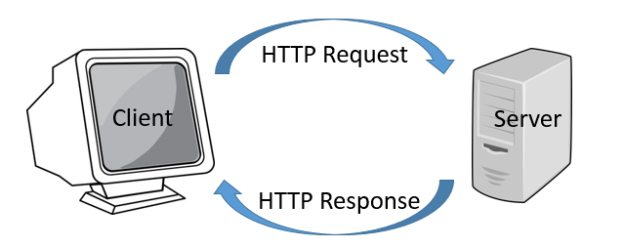

- HyperText Transfer Protocol : 컴퓨터통신규약
- CRUD : CREATE, READ, UPDATE, DELETE
- CRUD에 사용되는 RESTful HTTP 메소드 (강제성은 없고 아무렇게나 써도 되긴함)
   - GET : 특정 리소스요청
   - POST : 클라이언트->서버로 많은 정보를 보낼 때(회원가입)
   - PUT/PATCH : 서버의 특정 리소스를 업데이트(PUT=전부 / PATCH = 일부)
   - DELETE : 서버측의 특정 리소스 삭제(회원탈퇴)
   - 그외 : https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods
   - 튜토리얼 : https://restfulapi.net/rest-api-design-tutorial-with-example/
- HTTP 상태 코드 분류
   - 100번대 : 정보응답
   - 200번대 : 성공응답
   - 300번대 : 리다이렉션 메세지
   - 400번대 : 클라이언트 에러 응답
   - 500번대 : 서버 에러 응답

### Open API에서 데이터 받기

#### JSON형식으로 데이터 추출

In [ ]:
import requests
import json

url = ''  # API_URL
response = requests.get(url)
parsed_data = json.loads(response.text) # 제이슨형식으로 파일 받기

parsed_data['weather'][0]['main'] # 이런식으로 값 추출

#### tweepy

In [ ]:
pip install tweepy # https://docs.tweepy.org/en/stable/install.html

In [ ]:
import tweepy

auth = tweepy.OAuthHandler(api_key, api_key_secret)      # OAuth 뒤에 user 지우고 쓸것
auth.set_access_token(access_token, access_token_secret) # 왜 따로쓰느진 모르겠음

# 위의 2단계 보안체계로 api 사용할 수 있음
api = tweepy.API(auth) 

# 해당유저의 tweet 가져오기
api.user_timeline(username, tweet_mode = 'extended') # 140자 넘어가도 모두 추출 / 'compat' = 140자 이상 자름 

#### SQL INSERT ERROR

In [ ]:
# 1. 중복시 삽입 건너뜀(중복 레코드 관리를 위해 UNIQUE INDEX 필요)
INSERT IGNORE INTO 테이블명 ('컬럼','컬럼') VALUES ('데이터1', '데이터2')

# 2. 중복시 기존 데이터 삭제, 새 데이터 삽입
REPLACE INTO 테이블명 ('컬럼','컬럼') VALUES ('데이터1', '데이터2')

# 3. 중복시 기존데이터 업데이트
INSERT INTO 테이블명 ('컬럼1','컬럼2') VALUES ('데이터1', '데이터2') 
ON DUPLICATE KEY UPDATE '컬럼2' = VALUES('데이터2') # 업데이트할 컬럼 지정

In [ ]:
# PRIMARY 추가하는 방법
ALTER TABLE person ADD PRIMARY KEY (name)

# UNIQUE INDEX를 추가하는 방법
ALTER TABLE person ADD UNIQUE INDEX (name)